In [ ]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_lfw_people
from keras.models import Sequential,Model
from keras.layers import Conv2D,Dropout,Dense,MaxPooling2D,Flatten,Resizing,GlobalAveragePooling2D,BatchNormalization
from sklearn.model_selection import train_test_split
from keras.applications import ResNet50
from keras.applications.resnet import ResNet50
from keras.applications.resnet import preprocess_input
from skimage.transform import resize
from keras.utils import to_categorical
import keras as k
import tensorflow as tf

In [ ]:
lfw = fetch_lfw_people(min_faces_per_person=50,resize=1,color=True)

In [ ]:
X = lfw.images
X.shape

(1560, 125, 94, 3)

In [ ]:
y= lfw.target
target_name=lfw.target_names
print(len(target_name))
print(y.shape)

12
(1560,)


In [ ]:
x=preprocess_input(X)
y=to_categorical(y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
!pip install keras_vggface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install  keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras_vggface.vggface import VGGFace

In [ ]:
base_model = VGGFace(model='resnet50', include_top=False)
base_model.trainable = False
model = Sequential()
model.add(Resizing(224, 224))
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(12, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=5)

Epoch 1/5
117/117 [==============================] - 168s 1s/step - loss: 0.2735 - accuracy: 0.9709 - val_loss: 0.0215 - val_accuracy: 0.9949
Epoch 2/5
117/117 [==============================] - 164s 1s/step - loss: 0.0807 - accuracy: 0.9940 - val_loss: 0.1989 - val_accuracy: 0.9769
Epoch 3/5
117/117 [==============================] - 165s 1s/step - loss: 0.0491 - accuracy: 0.9923 - val_loss: 0.0262 - val_accuracy: 0.9974
Epoch 4/5
117/117 [==============================] - 162s 1s/step - loss: 0.0322 - accuracy: 0.9983 - val_loss: 3.0566e-10 - val_accuracy: 1.0000
Epoch 5/5
117/117 [==============================] - 162s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 3.0566e-10 - val_accuracy: 1.0000


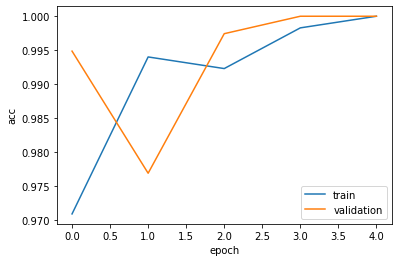

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

In [ ]:
y_predicted = model.predict(x_test)

13/13 [==============================] - 48s 3s/step


In [ ]:
y_predicted=y_predicted.argmax(axis=1)
y_test=y_test.argmax(axis=1)

In [ ]:
print(target_name[y_test[0]])
print(target_name[y_predicted[0]])

Gerhard Schroeder
Gerhard Schroeder
